# Proyecto final= Test A/B

## Objetivo del proyecto

El objetivo de este estudio es comprobar si la prueba A/B llamada recommender_system_test se realizó de forma correcta y, al mismo tiempo, evaluar si el nuevo sistema de recomendaciones mejora el rendimiento del embudo de ventas en comparación con el grupo de control.

## Importación de librerías y carga de datasets 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import chi2_contingency 


In [10]:
df_events = pd.read_csv("/datasets/final_ab_events_upd_us.csv") 
df_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv") 
df_parts = pd.read_csv("/datasets/final_ab_participants_upd_us.csv") 
df_mark = pd.read_csv("/datasets/ab_project_marketing_events_us.csv") 

In [11]:

NAME_TEST = "recommender_system_test"
LAUNCH_DATE = pd.Timestamp("2020-12-07")
DEADLINE = pd.Timestamp("2020-12-21")  
COMPLETION_DATE = pd.Timestamp("2021-01-01")
AUDIENCE = "EU"


1. Se importaron las librerias y se leyeros los dataframes.
2. Se guardaron los párametros del test que se utilizara para filtrar más adelante. 

## Exploración de datos 

In [16]:
df_events.info()
print(df_events.describe())
print(df_events.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99


In [17]:
df_users.info()
print(df_users.describe())
print(df_users.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     FC75077022837EF5  2020-12-21     EU  Android
freq                   1        6077  43396    26159
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone


In [18]:
df_parts.info()
print(df_parts.describe())
print(df_parts.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     C26CED3FB9AFF742      A  interface_eu_test
freq                   2   8214              10850
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test


In [19]:
df_mark.info()
print(df_mark.describe())
print(df_mark.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
                           name regions    start_dt   finish_dt
count                        14      14          14          14
unique                       14       6          14          14
top     Single's Day Gift Promo    APAC  2020-01-25  2020-02-07
freq                          1       4           1           1
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3      

1. Se utilizo info(), describe () y head() para explorar la composición de los datos. 

## Tratamiento de datos

### Estandarización de columnas 

In [20]:
df_events["event_dt"] = pd.to_datetime(df_events["event_dt"])
df_users["first_date"] = pd.to_datetime(df_users["first_date"])
df_mark["start_dt"]= pd.to_datetime(df_mark["start_dt"])
df_mark["finish_dt"]= pd.to_datetime(df_mark["finish_dt"])


In [21]:
df_events["event_name"] = df_events["event_name"].astype("category")
df_users["region"] = df_users["region"].astype("category")
df_users["device"] = df_users["device"].astype("category")
df_parts["ab_test"] = df_parts["ab_test"].astype("category")
df_parts["group"] = df_parts["group"].astype("category")


In [22]:
df_events.info()
df_users.info()
df_mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  category      
 3   details     60314 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  category      
 3   device      58703 non-null  category      
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
Range

1. Se convirtieron las columna de fechas a datatime.
2. Se conviertieron algunas columnas a category para facilitar la prueba.

### Datos nulos y duplicados 

In [24]:
def null_and_duplicate_data(df, name):
    print("duplicados:", df.duplicated().sum())
    print("faltantes por col:\n", df.isna().sum())

null_and_duplicate_data(df_events, "events")
null_and_duplicate_data(df_users,  "users")
null_and_duplicate_data(df_parts,  "participants")
null_and_duplicate_data(df_mark,    "marketing")

duplicados: 0
faltantes por col:
 user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64
duplicados: 0
faltantes por col:
 user_id       0
first_date    0
region        0
device        0
dtype: int64
duplicados: 0
faltantes por col:
 user_id    0
group      0
ab_test    0
dtype: int64
duplicados: 0
faltantes por col:
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


1. Se buscaron datos nulos y duplicados.
2. Se encontraron datos nulos en la columna details, sin embargo, se considero que era normal por la naturaleza de la columna, ya que, es una columna que tiene datos adicionales sobre el evento, como el monto de la compra en USD. Lo que para eventos como login y product_page no aplica, por lo cual queda vacío.   

## Análisis exploratorio y preparación inicial de la prueba A/B

### Usuarios elegibles y filtrado de eventos 

In [25]:
selected_users = df_users.query(
    "region == @AUDIENCE and @LAUNCH_DATE  <= first_date <= @DEADLINE"
).copy()

test_participants =df_parts.query("ab_test == @NAME_TEST").copy()

pop = selected_users.merge(test_participants[["user_id","group"]], on="user_id", how="inner")
pop["group"] = pop["group"].cat.remove_unused_categories()
print("Usuarios elegibles con grupo:", pop.shape[0])

Usuarios elegibles con grupo: 3481


In [26]:
test_events = df_events.query("@LAUNCH_DATE <= event_dt <= @DEADLINE").copy()
event_users_test = test_events.merge(pop[["user_id","first_date","group"]], on="user_id", how="inner")

event_users_test = event_users_test[
    (event_users_test["event_dt"] >= event_users_test["first_date"]) &
    (event_users_test["event_dt"] <= event_users_test["first_date"] + pd.Timedelta(days=14))
]
print("Eventos dentro de ventana 14 días:", event_users_test.shape[0])

Eventos dentro de ventana 14 días: 14384


1. Se filtró los parametros del test con query con los parametros anteriormente definidos. Todo lo anterior en la variable test_participants. 
2. Se utilizó merge() para unir los usuarios elegibles(select_users) y la lista de participantes del test (test_participants).
3. Después, se procedió a filtrar nuevamente con query las fechas tanto de inicio como de cierre del experimento. Todo ello quedó dentro de la variable event_users_test. 

### Eventos por usuario 

In [691]:
events_per_user = event_users_test.groupby(["user_id","group"], observed=True).size().reset_index(name="n_events")

summary_by_group = events_per_user.groupby("group", observed=True)["n_events"].describe()
print(summary_by_group)

        count      mean       std  min  25%  50%  75%   max
group                                                      
A      2206.0  4.851768  2.972323  1.0  3.0  4.0  6.0  20.0
B       794.0  4.636020  3.090442  1.0  2.0  4.0  6.0  24.0


In [693]:
user_by_group = pop.groupby("user_id")["group"].nunique()
both_groups = user_by_group[user_by_group > 1].index
print("Usuarios en ambas muestras:", len(both_groups))

Usuarios en ambas muestras: 0


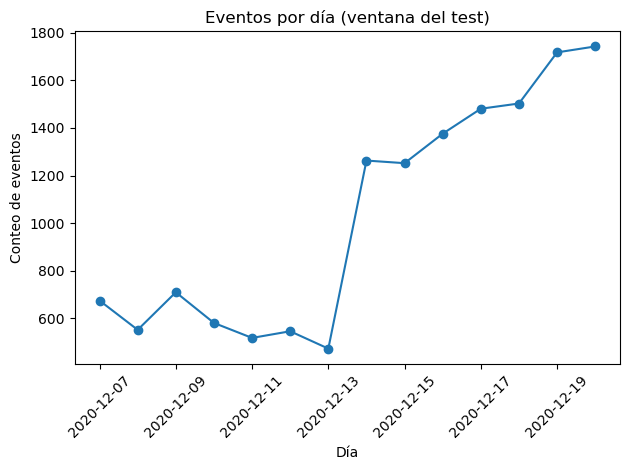

In [695]:

event_users_test["day"] = event_users_test["event_dt"].dt.date
daily = event_users_test.groupby("day")["event_name"].count()


daily.plot(kind="line", marker="o")
plt.title("Eventos por día (ventana del test)")
plt.xlabel("Día")
plt.ylabel("Conteo de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Para contar el número de eventos por usuario, se utilizó y size() groupby en la variable event_users_test.
2. Asimismo, se verificó que los usuarios no aparecieran en ambos grupos, con groupby() y nunique().
3. Por último, para ver la distribución de los eventos por día se creo una columna en event_users_test, "dia", que agrupo la fecha de los eventos del test y se utilizó count() para contarlos.
4. Finalmente, se graficó. 

Conclusiones: 

a) En lo referente a la distribución de eventos por usuario, podemos ver que la media es casi igual en ambos grupos, que la mediana es casi identica, al igual que la dispersión. Por lo cual, se puede concluir que los usuarios estan distribuidos equitativamente en las muestras. 
b) En lo referente a el número de eventos por día, se puede observar que el día 23-12-2020 hay un pico fuerte, a partir de ese día, los eventos del día se mantienen subiendo. 


### Embudo de conversión 

In [27]:

funnel_events = ["login", "product_page", "product_cart", "purchase"]
event_users_test_f = event_users_test[event_users_test["event_name"].isin(funnel_events)].copy()

pivot = (event_users_test_f.groupby(["user_id","event_name"], observed=True)
              .size()
              .unstack(fill_value=0)
              .reindex(columns=funnel_events, fill_value=0))

for col in funnel_events:
    pivot[col] = (pivot[col] > 0).astype(int)

pivot = pop[["user_id","group"]].merge(
    pivot, left_on="user_id", right_index=True, how="left"
)
pivot[funnel_events] = pivot[funnel_events].fillna(0).astype("int8")

conversion = (
    pivot.groupby("group", observed=True)[funnel_events]
         .mean()
         .sort_index()
)

print("\nConversión por grupo:")
print((conversion * 100).round(2))




Conversión por grupo:
       login  product_page  product_cart  purchase
group                                             
A      84.72         54.53         25.73     26.88
B      90.42         51.08         25.66     25.54


1. Se definió el embudo y se filtraron los eventos. 
2. Se agruparon user_id y event_name y se contaron.
3. Se convirtieron los indicadores a conteos 0/1.
4. Se utilizó merge con la población del test para traer la columna group.
5. Por último se calculó la tasa de conversión. 

Conclusiones: Se puede observar, que en login, el Grupo B tiene más usuarios que iniciaron sesión. En product_page, el Grupo A supera ligeramente al B. en product_cart son muy similares. Finalmente en purchase el Grupo A tiene una ligera ventaja sobre B. Esto nos dice que si bien el Grupo B lograr captar a más usuarios en el inicio, esta tendencia no consigue traducirse en compras. Al contrario, aunque el Grupo A tiene menos logins, consigue ligeramente más conversiones. 

## Resultados del Experimento 

In [28]:
alpha = 0.05 
total_user_group_a = (pivot["group"]=="A").sum()
total_user_group_b = (pivot["group"]=="B").sum()

for metric in funnel_events:  
    users_group_a = pivot.loc[pivot["group"]=="A", metric].sum()
    users_group_b = pivot.loc[pivot["group"]=="B", metric].sum()
    
    z, p = proportions_ztest([users_group_a, users_group_b], [total_user_group_a, total_user_group_b], alternative="larger") 
    prop_A = users_group_a / total_user_group_a
    prop_B = users_group_b / total_user_group_b
  

    print(f"\n=== {metric} ===")
    print(f"Tasa de conversión A: {prop_A:.2%}  |  Tasa de conversión B: {prop_B:.2%}")
    print(f" Estadístico z = {z:.2f}, Valor de p = {p:.4f}")
    
    if p < alpha:
        print("Rechazamos H₀ → Sí hay diferencia estadística (B > A)")
    else:
        print("No rechazamos H₀ → No hay evidencia suficiente de diferencia")

    
    


=== login ===
Tasa de conversión A: 84.72%  |  Tasa de conversión B: 90.42%
 Estadístico z = -4.23, Valor de p = 1.0000
No rechazamos H₀ → No hay evidencia suficiente de diferencia

=== product_page ===
Tasa de conversión A: 54.53%  |  Tasa de conversión B: 51.08%
 Estadístico z = 1.77, Valor de p = 0.0383
Rechazamos H₀ → Sí hay diferencia estadística (B > A)

=== product_cart ===
Tasa de conversión A: 25.73%  |  Tasa de conversión B: 25.66%
 Estadístico z = 0.04, Valor de p = 0.4827
No rechazamos H₀ → No hay evidencia suficiente de diferencia

=== purchase ===
Tasa de conversión A: 26.88%  |  Tasa de conversión B: 25.54%
 Estadístico z = 0.78, Valor de p = 0.2185
No rechazamos H₀ → No hay evidencia suficiente de diferencia


1. Se definió la significancia en 0.05.
2. Se contaron el número de suarios en cada grupo del experimento.
3. Se hace un bucle para correr a los usuarios del Grupo A y del Grupo B que hicieron el evento.
4. Se aplica el test estadístico.
5. Se calculan las proporciones.
6. Se muestra 

## Conclusiones 

El objetivo de este estudio fue comprobar si la prueba A/B recommender_system_test se llevó a cabo de forma correcta y, al mismo tiempo, evaluar si el nuevo sistema de recomendaciones mejoraba el rendimiento del embudo de ventas en comparación con el grupo de control.

En primer lugar, respecto a la distribución de eventos por usuario, se observó que la media, la mediana y la dispersión son prácticamente iguales en ambos grupos. Esto permite concluir que las muestras están equilibradas y que los usuarios se encuentran distribuidos de manera equitativa, garantizando la validez de la comparación. En cuanto a la evolución temporal de los eventos, se detectó un pico pronunciado el 23-12-2020, a partir del cual la actividad diaria mostró una tendencia ascendente. Lo que podría deberse a algún evento especial o una campaña dentro de la app. 
Por otro lado, al analizar las etapas del embudo, se encontró que en login el grupo B tuvo mayor número de usuarios, pero en product_page el grupo A presentó una tasa ligeramente superior. En product_cart, ambos grupos tuvieron un comportamiento muy similar y en purchase el grupo A obtuvo una ligera ventaja sobre B. 
Finalmente, el análisis de la prueba A/B muestra que el nuevo sistema de recomendaciones no alcanzó el objetivo de mejorar en al menos un 10 % las conversiones del embudo. Por el contrario, en la etapa crítica de pago de producto, el grupo del experimento mostró un rendimiento inferior.

En suma, el análisis de la prueba A/B recommender_system_test confirma que las muestras estuvieron equilibradas y comparables, pero el nuevo sistema de recomendaciones no alcanzó el objetivo de mejorar en al menos un 10 % las conversiones del embudo. Aunque el grupo B captó más usuarios en el inicio (login), esta ventaja no se tradujo en compras; por el contrario, en la etapa clave de vistas de producto mostró un rendimiento significativamente inferior al grupo de control. Dado que no se evidencian mejoras y sí un retroceso en un punto crítico del embudo, no se recomienda su implementación en producción y se sugiere revisar posibles factores que afectaron negativamente la experiencia de los usuarios antes de plantear nuevas pruebas.
